In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**Задание 1**

1.1

In [17]:
eye = pd.read_csv('/Users/kotyarodionova/ml_lab1/working_df_IA.csv')
eye.head()

,Slovoforma,lemma,part_of_speech,letters_in_slovoforma,slogi_slovoforma,rang_frequency_NKRIA,IA_DWELL_TIME_%,IA_AVERAGE_FIX_PUPIL_SIZE,IA_FIRST_FIXATION_DURATION,IA_FIRST_FIXATION_TIME,IA_FIRST_FIX_PROGRESSIVE,IA_FIRST_RUN_FIXATION_%,IA_REGRESSION_IN,IA_REGRESSION_OUT,IA_REGRESSION_PATH_DURATION,TRIAL_FIXATION_COUNT,sex,grade
0,клубни,клубень,S,6,2,2,0.0057,1338.0,106,9330,1,0.0130,0,0,106,77,m,3
1,снова,снова,ADV,5,2,5,0.0063,1006.0,108,14176,0,0.0130,0,0,108,77,f,2
2,собаки,собака,S,6,3,5,0.0034,1150.0,108,19886,1,0.0094,0,0,108,106,m,2
3,траве,трава,S,5,2,4,0.0123,1360.0,110,298,0,0.0312,1,0,476,32,f,3
4,шуба,шуба,S,4,2,3,0.0023,864.0,112,52850,1,0.0057,0,1,658,174,m,2


In [18]:
np.unique(eye['part_of_speech']) #часть речи 5 -- кажется, ошибка

array(['5', 'A', 'ADV', 'CON', 'NUM', 'P', 'PART', 'PR', 'S', 'V', 'VP'],
      dtype=object)

In [19]:
eye = eye.dropna()
eye = eye[eye.part_of_speech != '5']

In [20]:
X_eye = eye[['part_of_speech', 'letters_in_slovoforma', 'slogi_slovoforma', 'rang_frequency_NKRIA']]
y_eye = eye['IA_DWELL_TIME_%']
from sklearn.model_selection import train_test_split
X_eye_train, X_eye_test, y_eye_train, y_eye_test = train_test_split(X_eye,
                                                                        y_eye,
                                                                      test_size=0.2
                                                                       )

In [21]:
#части речи - номинальная шкала, поэтому ее надо закодировать
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder()
onehot.fit(X_eye_train[['part_of_speech']])
X_eye_train_POS = onehot.transform(X_eye_train[['part_of_speech']])
X_eye_test_POS = onehot.transform(X_eye_test[['part_of_speech']])
#остальные 3 зависимых переменных – уже числа, их кодировать не нужно, шкалировать тоже (разброс значений небольшой)

In [22]:
X_eye_train.shape

(4188, 4)

In [23]:
X_eye_train.loc[:, X_eye_train.columns != 'part_of_speech']

,letters_in_slovoforma,slogi_slovoforma,rang_frequency_NKRIA
1702,6,3,4
1666,8,4,5
3716,8,3,2
2684,3,1,5
1352,3,1,5
...,...,...,...
244,6,3,4
1480,5,2,5
3206,5,3,5
4235,6,2,5


In [24]:
X_eye_train_enc = np.asarray(np.concatenate([X_eye_train_POS.todense(), X_eye_train.loc[:, X_eye_train.columns != 'part_of_speech']], axis = 1))
X_eye_test_enc = np.asarray(np.concatenate([X_eye_test_POS.todense(), X_eye_test.loc[:, X_eye_test.columns != 'part_of_speech']], axis = 1))

In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_eye_train_enc, y_eye_train)

LinearRegression()

In [26]:
y_eye_pred = lr.predict(X_eye_test_enc)

In [27]:
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f" % mean_squared_error(y_eye_test, y_eye_pred))
print("R squared: %.2f" % r2_score(y_eye_test, y_eye_pred))

Mean squared error: 0.00
R squared: 0.21


In [42]:
#странное значение mean squared error -- потому что маленькие значения в зависимой переменной.
print("y_eye_train variance:", np.var(y_eye_train))

y_eye_train variance: 0.0005797251037364902


In [41]:
from sklearn.metrics import mean_absolute_percentage_error
print(f"Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_eye_test, y_eye_pred)}")

Mean Absolute Percentage Error: 0.6475672119071929


In [28]:
from sklearn.ensemble import RandomForestRegressor
rf_eye = RandomForestRegressor(max_features=1/3)

In [29]:
rf_eye.fit(X_eye_train_enc, y_eye_train)

RandomForestRegressor(max_features=0.3333333333333333)

In [30]:
rf_y_eye_pred = rf_eye.predict(X_eye_test_enc)

In [45]:
print("Mean squared error: %.2f" % mean_squared_error(y_eye_test, rf_y_eye_pred))
print("R squared: %.2f" % r2_score(y_eye_test, rf_y_eye_pred)) #ну хотя бы r squared выше))) но всё еще не особо большая объяснительная сила у модели
print(f"Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_eye_test, rf_y_eye_pred)}")

Mean squared error: 0.00
R squared: 0.36
Mean Absolute Percentage Error: 0.5582355256825414


Задание 1.2

In [46]:
X_eye2 = eye[['IA_DWELL_TIME_%', 'IA_AVERAGE_FIX_PUPIL_SIZE', 'IA_FIRST_FIXATION_DURATION', 'IA_FIRST_FIXATION_TIME', 'IA_FIRST_FIX_PROGRESSIVE', 'IA_FIRST_RUN_FIXATION_%', 'IA_REGRESSION_IN', 'IA_REGRESSION_OUT', 'IA_REGRESSION_PATH_DURATION']]
y_eye2 = eye['sex']
from sklearn.model_selection import train_test_split
X_eye2_train, X_eye2_test, y_eye2_train, y_eye2_test = train_test_split(X_eye2,
                                                                        y_eye2,
                                                                      test_size=0.2
                                                                       )

In [47]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(X_eye2_train)
X_eye2_train_scaled = scaler.transform(X_eye2_train)
X_eye2_test_scaled = scaler.transform(X_eye2_test)

In [48]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(y_eye2_train)
y_eye2_train_enc = label.transform(y_eye2_train)
y_eye2_test_enc = label.transform(y_eye2_test)

In [49]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_eye2_train_scaled, y_eye2_train_enc)
y_eye2_pred = nb.predict(X_eye2_test_scaled)

In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_eye2_test_enc, y_eye2_pred, target_names=label.classes_))

              precision    recall  f1-score   support

           f       0.70      0.91      0.79       724
           m       0.36      0.11      0.17       323

    accuracy                           0.66      1047
   macro avg       0.53      0.51      0.48      1047
weighted avg       0.59      0.66      0.60      1047



In [51]:
from sklearn.ensemble import GradientBoostingClassifier #у нас ведь табличные данные, почему бы не взять градиентный бустинг
gb_eye = GradientBoostingClassifier()
gb_eye.fit(X_eye2_train_scaled, y_eye2_train_enc)
gb_y_eye2_pred = gb_eye.predict(X_eye2_test_scaled)

In [61]:
print(classification_report(y_eye2_test_enc, gb_y_eye2_pred, target_names=label.classes_)) #немного лучше, чем не-ансамблевый байес! особенно сильно лучше определяет мужчин (хотя женщин по-прежнму намного лучше, но логично: их в 2 раза больше)

              precision    recall  f1-score   support

           f       0.76      0.93      0.83       724
           m       0.68      0.33      0.44       323

    accuracy                           0.74      1047
   macro avg       0.72      0.63      0.64      1047
weighted avg       0.73      0.74      0.71      1047



1.3

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
param_grid = {'var_smoothing': [0.5, 1, 2, 5, 10]}
search = GridSearchCV(nb, param_grid, n_jobs=2, cv=5, scoring='r2', return_train_score=True, verbose=1) #будем смотреть наивный байес

In [65]:
search.fit(X_eye2_train_scaled, y_eye2_train_enc)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=2,
             param_grid={'var_smoothing': [0.5, 1, 2, 5, 10]},
             return_train_score=True, scoring='r2', verbose=1)

In [66]:
gs_results_df = pd.DataFrame(search.cv_results_)
gs_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_var_smoothing,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.000770,0.000082,0.000357,0.000032,0.5,{'var_smoothing': 0.5},-0.523518,-0.507311,-0.496506,-0.513601,...,-0.511989,0.009449,5,-0.511806,-0.517210,-0.514508,-0.515637,-0.518338,-0.515500,0.002264
1,0.000660,0.000046,0.000315,0.000035,1.0,{'var_smoothing': 1},-0.518116,-0.496506,-0.485701,-0.513601,...,-0.508748,0.015725,4,-0.510455,-0.513157,-0.505051,-0.512935,-0.507532,-0.509826,0.003138
2,0.000664,0.000040,0.000327,0.000029,2.0,{'var_smoothing': 2},-0.501908,-0.485701,-0.469493,-0.508196,...,-0.494699,0.015051,3,-0.495594,-0.498296,-0.500998,-0.495374,-0.496725,-0.497397,0.002077
3,0.000629,0.000039,0.000294,0.000017,5.0,{'var_smoothing': 5},-0.485701,-0.491103,-0.485701,-0.491979,...,-0.490373,0.004380,1,-0.488838,-0.487487,-0.488838,-0.488620,-0.485918,-0.487941,0.001129
4,0.000629,0.000045,0.000298,0.000035,10.0,{'var_smoothing': 10},-0.491103,-0.491103,-0.491103,-0.491979,...,-0.491453,0.000429,2,-0.491541,-0.491541,-0.491541,-0.491322,-0.491322,-0.491453,0.000107


In [67]:
search.best_params_

{'var_smoothing': 5}

**Задание 2**

2.1

In [100]:
eleg = pd.read_csv('/Users/kotyarodionova/ml_lab1/elegies.csv')

In [78]:
''' from pymystem3 import Mystem
mystem = Mystem()
eleg['text'] = eleg['text'].apply(mystem.lemmatize)
texts = [" ".join(line) for line in eleg['text']] '''

In [101]:
from pymystem3 import Mystem
mystem = Mystem()
from nltk.corpus import stopwords 
stopwords_ru = stopwords.words('russian')
import re

eleg['text'] = eleg['text'].apply(mystem.lemmatize)
eleg['text'] = eleg['text'].apply(lambda tokens: [token for token in tokens if token.strip() not in stopwords_ru and token.strip() != ''])
texts = [" ".join(line) for line in eleg['text']]

In [102]:
eleg.head()

,id,text,author,year,title
0,343,"[дерево, поздний, злак, поле, лист, поблеклый,...",Туманский В.И.,1823,Падение листьев
1,488,"[дружба, обещать, бессмертие, венок, ;\n, прим...",Батюшков К.Н.,1817,К Г***чу
2,298,"[волшебница, !, твой, ненавистный, дар, !, мер...",[Н.К.],1822,Коринне
3,323,"[мечта, , , мечта, !, ваш, сладость, ?, - , н...",Пушкин А.С.,1831,Элегия
4,14,"[лишь, сумрак, одеваться, поле, небо, свод, по...",[А. Сырох-въ],1820,Елегии жителя берегов Чернаго моря


In [103]:
len(np.unique(eleg['year']))

21

In [104]:
texts

['дерево поздний злак поле лист поблеклый опадать ,\n дубрава тень стоять ,\n молчать пустынный соловей . недуг тоска томить ,\n место страдалец молодой последний страна родимый вверять печальный голос свой . " прощать ,  холм долина ,\n прощать ,  шумливый река ,\n слышать весть кончина падение каждый листок . роковой прорицание ! забывать твой страшный глас :\n " узреть роща увядание ,\n узреть последний . трепетать кипарис священный ! голова твой ,\n суровый смерть обреченный ,\n склонять сень свой ветвь . твой краткий век  -  сон лукавый :\n увянуть цвет день ,\n скоро ,  лист твой дубрава ,\n скоро ,  злак твой поле " . сбываться ! свой дыхание хладный болезнь подуть ,\n сон неясный ,  безотрадный промчаться молодость . шуметь ,  валисить ,  лист минутный ,\n шуметь ,  валиться родной ветвь ,\n засыпать ,  сокрыть холм приютный взор мать . дева ,  драгай ,\n покрывало ,  тишина ,\n призрак из-за древо мелькать ,\n грустный холм прийти ко ,\n плакать простодушно робко вымолвить :  

2.1

In [105]:
from sklearn.cluster import KMeans
X = texts
y = eleg['year']
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_vec = vectorizer.fit_transform(X)
kmeans = KMeans(n_clusters=21, random_state=0, n_init="auto").fit(X_vec)

In [106]:
from sklearn.metrics import silhouette_score, silhouette_samples, homogeneity_completeness_v_measure

In [107]:
print(f'Коэффициент силуэта: {silhouette_score(X_vec, kmeans.labels_)}')

Коэффициент силуэта: 0.0017959975288905762


In [108]:
samples_silhouettes = silhouette_samples(X_vec, kmeans.labels_)
silhouette_avg = silhouette_score(X_vec, kmeans.labels_)

In [109]:
# код: https://www.kaggle.com/code/realstay/clustering-with-silhouette-plot-elbow-method

def plot_silhouettes(samples_silhouettes, labels, n_clusters, silhouette_avg):
  fig, ax = plt.subplots()
  y_lower = 10

  for i in range(n_clusters):
      ith_cluster_silhouette_values = samples_silhouettes[labels == i]
      ith_cluster_silhouette_values.sort()
      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i


      ax.fill_betweenx(np.arange(y_lower,y_upper),
                      0,
                      ith_cluster_silhouette_values,
                      alpha=0.3)

      #label the silhouse plots with their cluster numbers at the middle
      ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

      #compute the new y_lower for next plot
      y_lower = y_upper +10

  ax.set_title("Silhouette plot")
  ax.set_xlabel("Silhouette score")
  ax.set_ylabel("Cluster label")

  #the vertical line for average silhouette score of all the values
  ax.axvline(x=silhouette_avg, color="red", linestyle="--")

  ax.set_yticks([])
  ax.set_xticks([-0.2,0,0.2,0.4,0.6,0.8,1])

  plt.show()

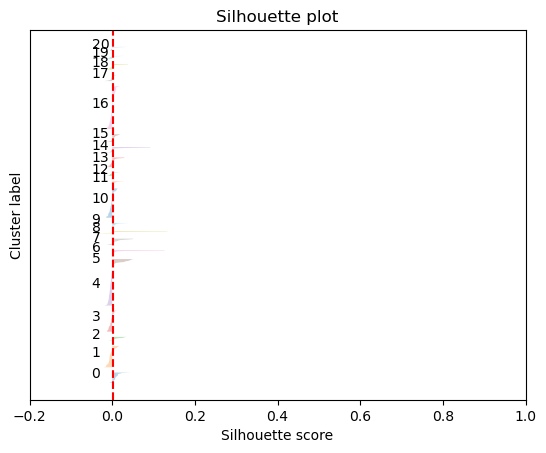

In [113]:
plot_silhouettes(samples_silhouettes, kmeans.labels_, 21, silhouette_avg) 
#выглядит как-то грустно. сложно воспринимать плот с 21 кластером

In [114]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y)
y_enc = le.transform(y)
print(homogeneity_completeness_v_measure(y_enc, kmeans.labels_))

(0.16028032394427033, 0.17396226756845948, 0.1668412662417416)


2.2

In [116]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, init='random', perplexity=3).fit_transform(X_vec)

In [117]:
def visualise_tsne(perplexity):
    X_embedded = TSNE(n_components=2, init='random', perplexity=perplexity).fit_transform(X_vec)
    fig, ax = plt.subplots(figsize=(5,5))
    plt.scatter(X_embedded[:,0], X_embedded[:,1], c=y)
    plt.show()

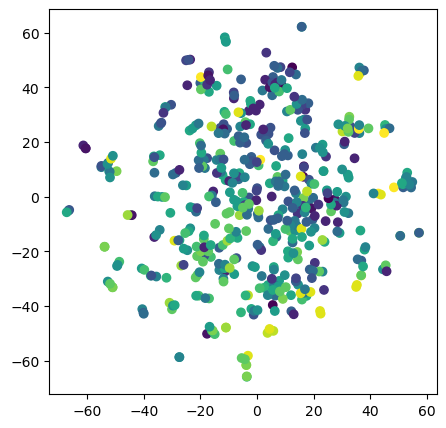

In [24]:
visualise_tsne(3)

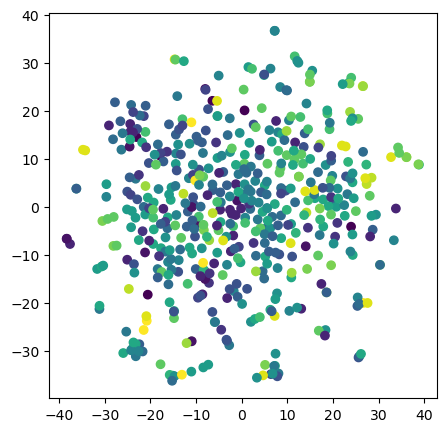

In [25]:
visualise_tsne(10)

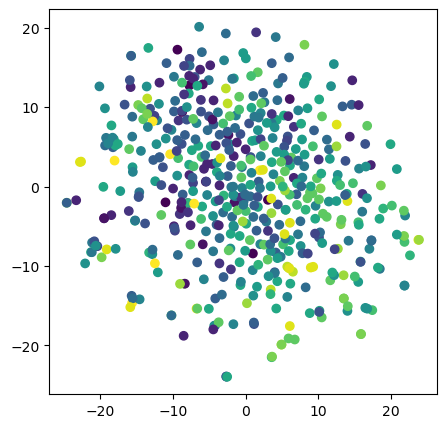

In [26]:
visualise_tsne(20)

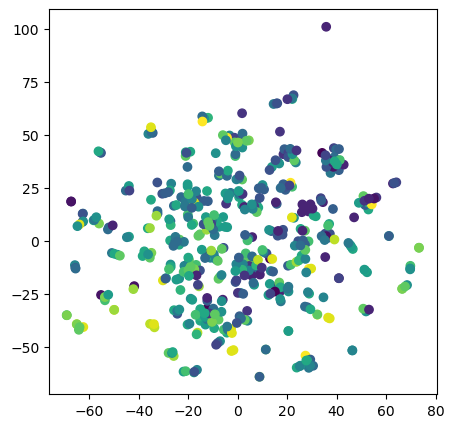

In [27]:
visualise_tsne(2)

Похоже, ни одно значение перплексии не выдаёт что-то похожее на интерпретируемые кластеры

In [118]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=20)
lda.fit(X_vec)

LatentDirichletAllocation(n_components=20)

In [119]:
def plot_top_words(model, feature_names, n_top_words, title, n_components, max_plots=5):

    fig, axes = plt.subplots(1, max_plots, figsize=(25, 10)) # параметры отображения
    axes = axes.flatten()
    all_features = {} # словарь для сохранения ключевых слов для тем


    for topic_idx, topic in enumerate(model.components_):
      if topic_idx < max_plots:
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]

        # строка для сохранения темы и слов в словарь
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 13})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=10)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=14)


    plt.show()

In [120]:
feature_names = vectorizer.get_feature_names_out()
n_components = 20

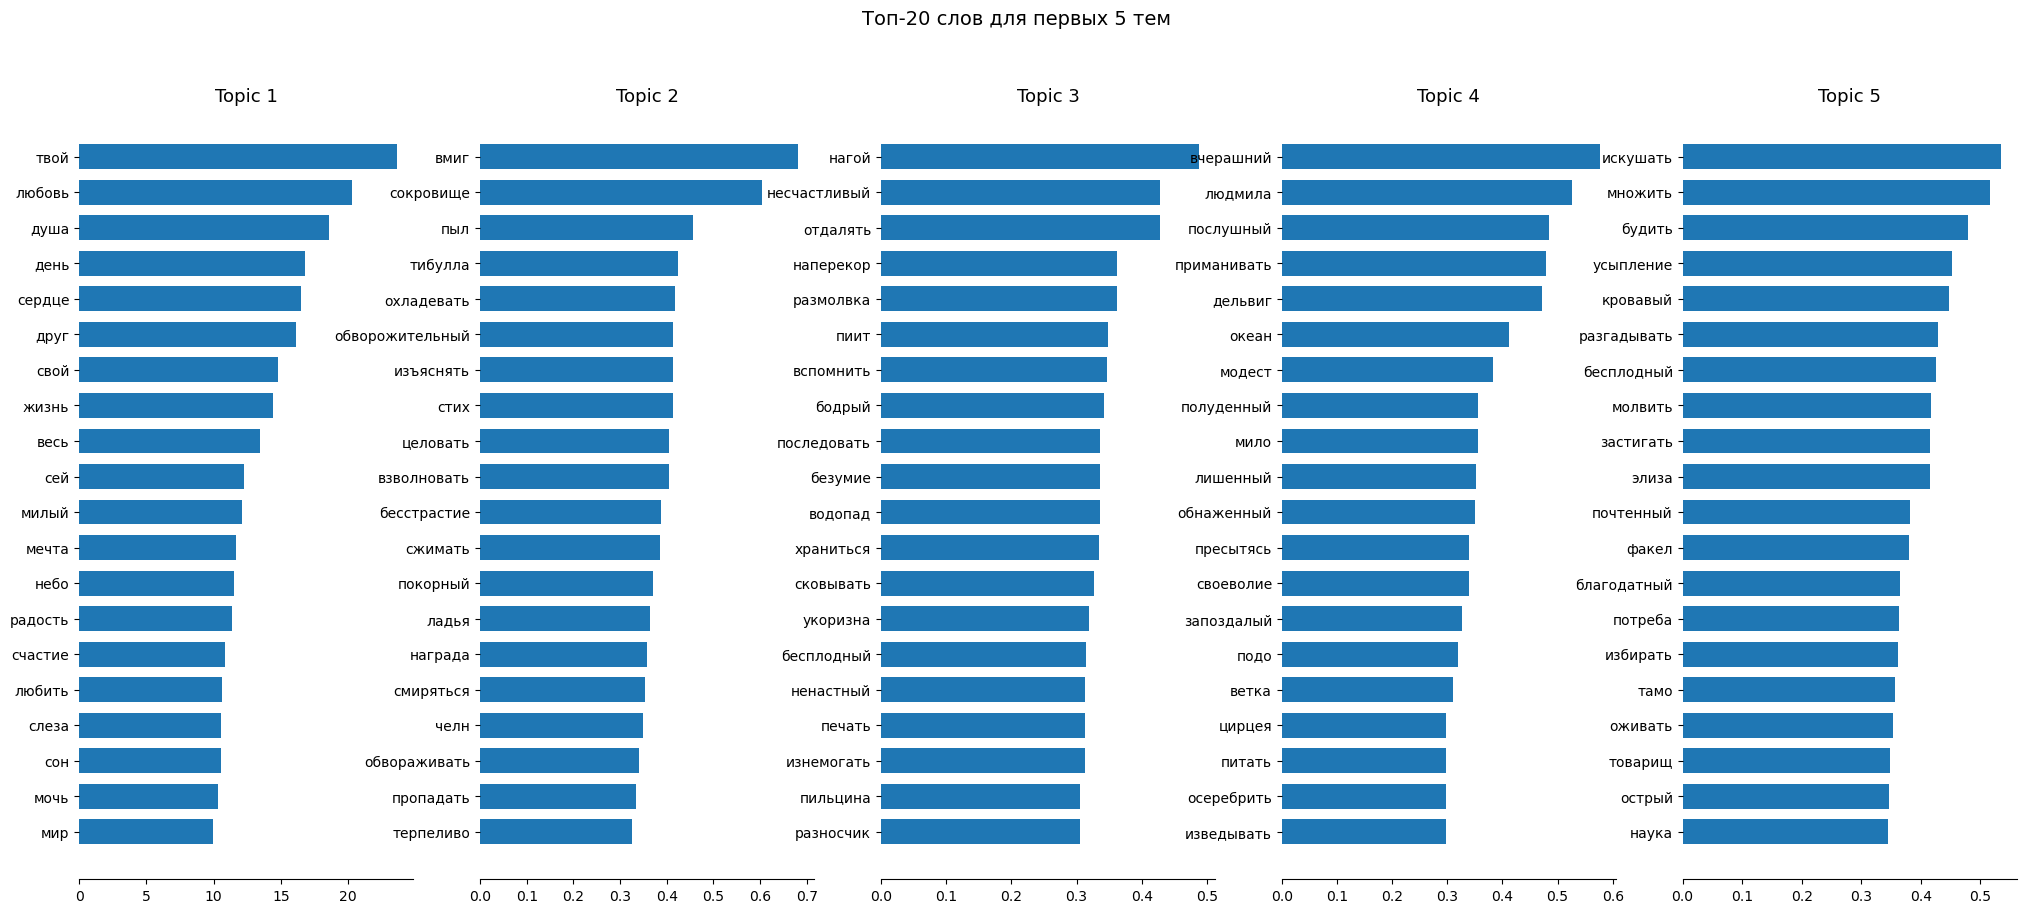

In [121]:
plot_top_words(lda, feature_names, 20, 'Топ-20 слов для первых 5 тем', n_components)

На первый взгляд темы не кажутся интерпретируемыми. В теме 2 больше описаний эмоций (пыл, взволновать, бесстрастие, обвораживать), в 1 что-то философское (душа, любовь, друг, жизнь, мечта, счастие и т.д.) но в целом сложно сделать какой-либо вывод о тематике того или иного топика.